In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Reading Data Set and creating Pandas Data Frame
os.chdir("C:\\Users\\VasuReddyMallela\\VM\\")

In [2]:
data = pd.read_csv("data1.csv")


In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,0.000000,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,0.464789,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,0.014085,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,0.619718,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,0.014085,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,0.323944,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
7028,2234-XADUH,0,0,1,1,1.000000,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7029,4801-JZAZL,0,0,1,1,0.140845,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7030,8361-LTMKD,1,1,1,0,0.042254,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [5]:
X = data.drop(columns=['Churn','customerID'],axis=1)
y = data['Churn']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   float64
 6   PhoneService                             7032 non-null   int64  
 7   MultipleLines                            7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 no

In [7]:
#############################################################################

# Select K-best features#

####################################################3

import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics



In [8]:
f1_list = []
for k in range(1, 26):
    bk = fs.SelectKBest(fs.f_classif, k=k)
    bk.fit(X, y)
    X_trans = bk.transform(X)
    train_x, test_x, train_y, test_y = train_test_split(X_trans,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=42)
    lr = LogisticRegression()
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    f1 = metrics.f1_score(test_y, y_pred)
    f1_list.append(f1)


In [9]:
fig, axe = plt.subplots(dpi = 300)
axe.plot(range(1, 26), f1_list)
axe.set_xlabel("best k features")
axe.set_ylabel("F1-score")
fig.savefig("img.png")
plt.close(fig)


In [10]:
# choose the f_classif as the metric and K is 3
bk = fs.SelectKBest(fs.f_classif, k=3)
bk.fit(X, y)
X_trans = bk.transform(X)

print (bk.scores_)
print (bk.pvalues_)


[5.13304300e-01 1.63012426e+02 1.61775966e+02 1.92188857e+02
 1.00750943e+03 9.61053682e-01 1.12845052e+01 2.12445453e+02
 4.79491212e+01 3.09371380e+01 1.96052416e+02 2.82404862e+01
 2.61354451e+01 2.67487636e+02 2.71576990e+02 2.91344862e+02
 1.10035764e+02 7.33951530e+02 3.83981781e+02 1.37579772e+03
 2.30627733e+02 7.03210304e+02 9.95001163e+01 1.29884195e+02
 7.02709162e+02 5.84064099e+01]
[4.73735737e-001 6.37729471e-037 1.17129049e-036 3.89653631e-043
 9.43765022e-207 3.26955281e-001 7.85724057e-004 1.96842643e-047
 4.76116524e-012 2.76320969e-008 5.88977801e-044 1.10431844e-007
 3.26690578e-007 4.87924813e-059 6.76084312e-060 4.87686569e-064
 1.48517266e-025 7.88744517e-154 2.73582328e-083 3.34315172e-275
 2.81432931e-051 9.15515924e-148 2.79966069e-023 7.92912729e-030
 1.15009951e-147 2.41521601e-014]


In [11]:
#apply SelectKBest class to extract top 9 best features
#Chi squared

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X.columns

chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

print(chi_feature, 'selected features')



10 selected features
['SeniorCitizen', 'tenure', 'OnlineSecurity', 'TechSupport', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check'] selected features


In [12]:
#########################################################################
#SequentialFeatureSelector - farward
#########################################################################

# pip install mlxtend

#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'recall',
          cv = 0)

sfs.fit(X, y)

print(sfs.k_feature_names_)     # to get the final set of features



('gender', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'StreamingTV', 'StreamingMovies', 'TotalCharges', 'InternetService_No', 'Contract_Month-to-month')


Feature Columns Index: [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 20, 23, 24, 25]
Feature Columns Names: ('gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'TotalCharges', 'InternetService_Fiber optic', 'Contract_One year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check')


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


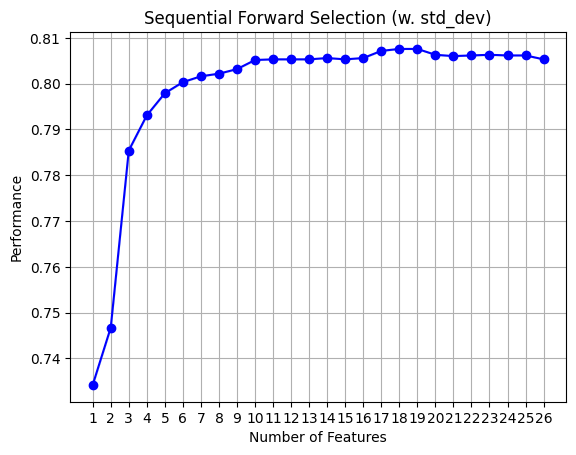

In [13]:
sfs1 = SFS(LogisticRegression(),
          k_features=(1,26),
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 0)

sfs1.fit(X, y)

# # Which features?
feat_cols = list(sfs1.k_feature_idx_)
print("Feature Columns Index:",feat_cols)

print("Feature Columns Names:",sfs1.k_feature_names_)     # to get the final set of features

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. std_dev)')
plt.grid()
plt.show()


In [14]:
#########################################################################
#SequentialFeatureSelector - backward
#########################################################################
# pip install mlxtend

#Sequential backward selection(sbs)



sbs = SFS(LogisticRegression(),
          k_features=10,
          forward=False,
          floating=False,
          scoring = 'recall',
          cv = 0)
sbs.fit(X, y)
print(sbs.k_feature_names_)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

('tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'PaymentMethod_Mailed check')


In [15]:
############## Variable selection using RFE method
## RFE - Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=10)

rfe = rfe.fit(X, y.values.ravel())

rfe_support=rfe.get_support()
print(rfe.get_support())
print(rfe.support_)
print(rfe.ranking_)


print("Selected Features",X.columns[rfe.support_])



[False False False False  True  True False  True False False  True False
 False False  True  True False  True  True  True False  True False False
 False False]
[False False False False  True  True False  True False False  True False
 False False  True  True False  True  True  True False  True False False
 False False]
[14  7 15  8  1  1  4  1  9 13  1  6  5  3  1  1 16  1  1  1 17  1 12 10
  2 11]
Selected Features Index(['tenure', 'PhoneService', 'OnlineSecurity', 'TechSupport',
       'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_Two year'],
      dtype='object')


Feature: 0, Score: -0.02349
Feature: 1, Score: 0.21279
Feature: 2, Score: -0.00750
Feature: 3, Score: -0.15438
Feature: 4, Score: -3.31853
Feature: 5, Score: -0.54605
Feature: 6, Score: 0.26133
Feature: 7, Score: -0.38593
Feature: 8, Score: -0.15103
Feature: 9, Score: -0.03133
Feature: 10, Score: -0.35817
Feature: 11, Score: 0.22567
Feature: 12, Score: 0.23501
Feature: 13, Score: 0.33952
Feature: 14, Score: -0.04724
Feature: 15, Score: 1.49893
Feature: 16, Score: -0.00846
Feature: 17, Score: 0.80888
Feature: 18, Score: -0.80098
Feature: 19, Score: 0.67797
Feature: 20, Score: -0.00247
Feature: 21, Score: -0.67606
Feature: 22, Score: -0.05056
Feature: 23, Score: -0.13743
Feature: 24, Score: 0.26462
Feature: 25, Score: -0.07720


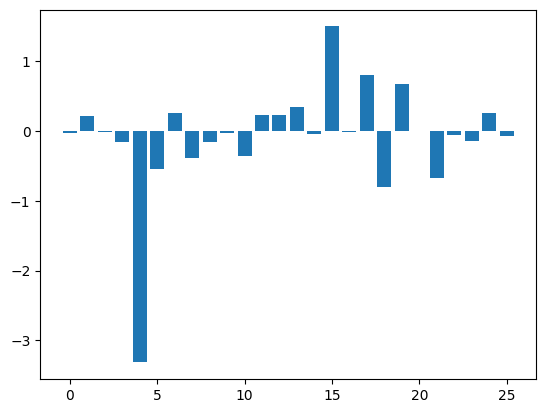

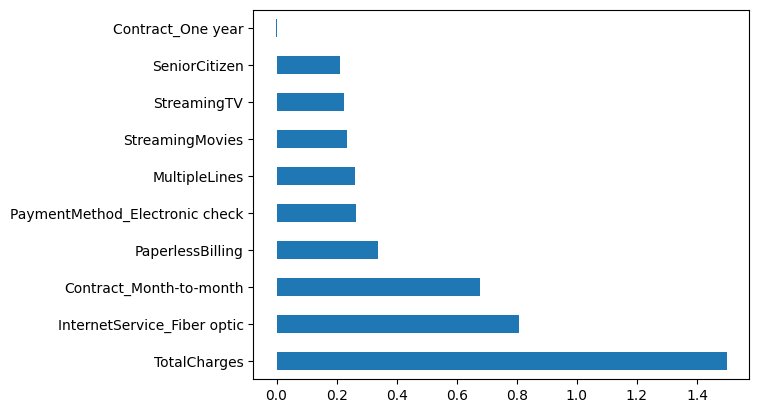

In [16]:
#############################################
# feature importance of logistic regression

model = LogisticRegression()

model.fit(X, y)

importance = model.coef_[0]

for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))

from matplotlib import pyplot
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()


#plot graph of feature importances for better visualization
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
